In [1]:
from pyWRspice import simulation as sim
from pyWRspice import script
from pyWRspice.waveforms import waveform_mod, waveforms_to_file
from pyWRspice.simulation import RawFile, values_to_binary, values_to_text, write_rawfile, Variable

comp = script.Component

import matplotlib.pyplot as plt
import multiprocessing as mp
import numpy as np
from numpy import pi, linspace, arange, floor, ceil, sin, cos

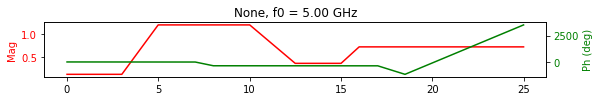

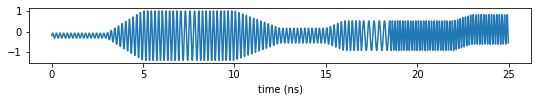

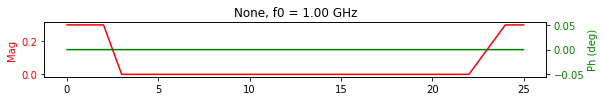

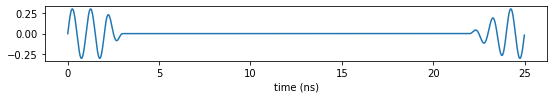

In [18]:
step = 10e-3 # ns
simtime = 25 #ns

w1 = waveform_mod(5e9, step, simtime, start_amp = 0.1, start_offset = -0.2)

w1.amp_ramp_to((3,5),1)
w1.roll((7,8),-2*pi)
w1.amp_ramp_to((10,12.5),0.3)
w1.amp_ramp_by((15,16),0.3)
w1.f_shift_by((17),-1.5e9)
w1.f_shift_to((18.5),7e9)
w1.os_ramp_by((22,23), 0.3)
w1.scale(1.2)
w1.plot()
w1.plot(wfm=True)

w2 = waveform_mod(1e9, step, simtime, start_amp = 0.3)
w2.amp_ramp_to((2,3),0.0)
w2.amp_ramp_by((22,24),0.3)
w2.plot()
w2.plot(wfm=True)

In [19]:
# 
title = "A test circuit for waveforms"

cir = script.Circuit()
cir.add_waveforms([w1, w2]) #

cir.add(comp("Ip1",  [1, 0], w1.wr_string + "+" + w2.wr_string))
cir.add(comp("R0", [0,1], 50))
cir.add(comp("C1", [0,1], 10e-12))

scr = script.Script(title)
scr.add_circuit(cir)
scr.analysis = f".tran {step*1000:.1f}p {simtime:.1f}n"
scr.config_save([0, 1],filename=None,filetype="binary") # specify which voltages to save; filename and filetype are optional

engine = sim.WRWrapper()
print(scr.script())

dat = engine.run(scr.script(), save_file=False)

*A test circuit for waveforms
.tran 10.0p 25.0n
.exec
load waveforms.raw
let constants.tm=tm constants.wfm0=wfm0 constants.wfm1=wfm1
.endc
Ip1 1 0 pwl(tm wfm0)+pwl(tm wfm1)
R0 0 1 50
C1 0 1 1e-11
.control
run
set filetype=binary
write {output_file} v(0) v(1)
.endc


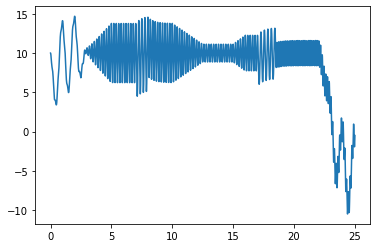

In [21]:
df = dat.to_df()
time = df['time'][:]
v = df["v(1)"][:]
plt.plot(time*1e9, v)